# New Tables: city-industry level

* Faire les tableaux suivants:
  * Tableau 4: Kuznet: benchmark → Revision
      * Trouver un tableau avec les déciles pour montrer:
        * turning point croissant pour des villes avec une dominance étatique de plus en plus large
      * Regarder si gdp/cap prix constant
      * Indiquer les turning points dans les tableaux
* Partie 6:
  * Tableau 8: 
    * estimer 2 modèles sur des échantillons differents
      * modèle 1 →  TCZ * Polluted * Period
      * modèle 2 → Target * polluted*Period  
    * Echantillonnage → prendre soit industry soit city industry
      * Big
        * Via Herfhindal 
          * benchmark →Revision
      * Foreign 
        * via output/capital/employment 
      * SOEs
        * via output/capital/employment 
      * SPZ
      * Coastal
    * Chaque tableau avec Panel A pour supérieur threshold, Panel B pour inférieur threshold
  * Tableau 9:
    * Enlever SPZ & Coastal
    * estimer 2 modèles sur des échantillons differents
      * modèle 1 →  TCZ * Polluted * Period
      * modèle 2 → Target * polluted*Period  
    * Idem tableau 8

In [1]:
import pandas as pd
from Fast_connectCloud import connector
import numpy as np

In [2]:
import functions.latex_beautify as lb

%load_ext autoreload
%autoreload 2

In [3]:
gs = connector.open_connection(online_connection = False,
                              path_credential = '/Users/thomas/Google Drive/Projects/Client_Oauth/Google_auth')

service = gs.connect_remote('GCP')

Service account storage and Bigquery are now connected. 
Service account storage is stored as <google.cloud.storage.client.Client object at 0xa16225e10> and accessible with "Storage_account" 
Service account Bigquery is stored as <google.cloud.bigquery.client.Client object at 0xa16222910> and accessible with "bigquery_account"


In [4]:
%put df_final --to R

from GoogleDrivePy.google_platform import connect_cloud_platform
project = 'valid-pagoda-132423'
gcp = connect_cloud_platform.connect_console(project = project, 
                                             service_account = service['GoogleCloudP'])    
query = (
          "SELECT * "
            "FROM China.SBC_pollution_China "

        )

df_final = gcp.upload_data_from_bigquery(query = query, location = 'US')
df_final.head()

,year,Period,Province_en,Lower_location,Larger_location,Coastal,cityen,geocode4_corr,TCZ_c,target_c,effort_c,industry,ind2,Short,output_fcit,capital_fcit,labour_fcit,out_share_SOE,cap_share_SOE,lab_share_SOE,tso2_cit,tso2_i,tCOD_cit,twaste_water_cit,polluted_di,polluted_mi,polluted_thre,FE_c_i,FE_t_i,FE_t_c
0,2002,Before,Shanxi,Central,Central,False,Yuncheng,1408,TCZ,0.485030,Above,3329,33,Smelting Non-ferrous Metals,0.000687,0.000293,0.00036,0.027567,0.221018,0.113467,24500,168934.454545,0.0,500,Above,Below,Above,11104,1573,889
1,2006,After,Hunan,Central,Central,False,Xiangtan,4303,TCZ,0.092754,Below,3329,33,Smelting Non-ferrous Metals,0.000950,0.000148,0.00023,0.027567,0.221018,0.113467,2304,168934.454545,0.0,300,Above,Below,Above,11105,1574,420
2,2007,After,Hunan,Central,Central,False,Xiangtan,4303,TCZ,0.092754,Below,3329,33,Smelting Non-ferrous Metals,0.001715,0.000365,0.00023,0.027567,0.221018,0.113467,2304,168934.454545,0.0,240,Above,Below,Above,11105,1572,421
3,2007,After,Liaoning,Northeast,Eastern,True,Jinzhou,2107,TCZ,0.080512,Below,3329,33,Smelting Non-ferrous Metals,0.007730,0.001296,0.00089,0.027567,0.221018,0.113467,3200,168934.454545,0.0,0,Above,Below,Above,11103,1572,287
4,2002,Before,Liaoning,Northeast,Eastern,True,Shenyang,2101,TCZ,0.230076,Above,3329,33,Smelting Non-ferrous Metals,0.000997,0.000052,0.00135,0.027567,0.221018,0.113467,3840,168934.454545,0.0,3500,Above,Below,Above,11106,1573,432


/Users/thomas/anaconda3/lib/python3.7/site-packages/pyarrow/feather.py:83: FutureWarning: The SparseDataFrame class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  if isinstance(df, _pandas_api.pd.SparseDataFrame):


In [5]:
options(warn=-1)
library(tidyverse)
library(lfe)
library(lazyeval)
library('progress')

path = "functions/SBC_pollution_R.R"
source(path)
path = "functions/SBC_pollutiuon_golatex.R"
source(path)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.0     ✔ purrr   0.3.3
✔ tibble  3.0.0     ✔ dplyr   0.8.5
✔ tidyr   1.0.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Loading required package: Matrix


Attaching package: ‘Matrix’


The following objects are masked from ‘package:tidyr’:

    expand, pack, unpack



Attaching package: ‘lazyeval’


The following objects are masked from ‘package:purrr’:

    is_atomic, is_formula



Please cite as: 


 Hlavac, Marek (2018). stargazer: Well-Formatted Regression and Summary Statistics Tables.

 R package version 5.2.2. https://CRAN.R-project.org/package=stargazer 




In [6]:
df_final <- df_final %>% 
    mutate_if(is.character, as.factor) %>%
    mutate_at(vars(starts_with("FE")), as.factor) %>%
    mutate(
         Period = relevel(Period, ref='Before'),
         TCZ_c = relevel(TCZ_c, ref='No_TCZ'),
         effort_c = relevel(effort_c, ref='Below'),
         polluted_di = relevel(polluted_di, ref='Below'),
         polluted_mi = relevel(polluted_mi, ref='Below'),
         polluted_thre = relevel(polluted_thre, ref='Below'),
  )
head(df_final)

,year,Period,Province_en,Lower_location,Larger_location,Coastal,cityen,geocode4_corr,TCZ_c,target_c,⋯,tso2_cit,tso2_i,tCOD_cit,twaste_water_cit,polluted_di,polluted_mi,polluted_thre,FE_c_i,FE_t_i,FE_t_c
,<dbl>,<fct>,<fct>,<fct>,<fct>,<lgl>,<fct>,<dbl>,<fct>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>
1,2002,Before,Shanxi,Central,Central,FALSE,Yuncheng,1408,TCZ,0.48502998,⋯,24500,168934.5,0,500,Above,Below,Above,11104,1573,889
2,2006,After,Hunan,Central,Central,FALSE,Xiangtan,4303,TCZ,0.09275420,⋯,2304,168934.5,0,300,Above,Below,Above,11105,1574,420
3,2007,After,Hunan,Central,Central,FALSE,Xiangtan,4303,TCZ,0.09275420,⋯,2304,168934.5,0,240,Above,Below,Above,11105,1572,421
4,2007,After,Liaoning,Northeast,Eastern,TRUE,Jinzhou,2107,TCZ,0.08051164,⋯,3200,168934.5,0,0,Above,Below,Above,11103,1572,287
5,2002,Before,Liaoning,Northeast,Eastern,TRUE,Shenyang,2101,TCZ,0.23007570,⋯,3840,168934.5,0,3500,Above,Below,Above,11106,1573,432
6,2002,Before,Guangdong,Coastal,Eastern,TRUE,Meizhou,4414,No_TCZ,0.02596999,⋯,72752,168934.5,15500,115000,Above,Below,Above,11107,1573,909


# Partie 6

## Tableau 8 A and B 

Estimate the following models using different subsamples:

### Model A 

$$
Log SO2 emission _{i k t}=\alpha\left(\text { Period } \times \text { TCZ }_{i} \times \text { Polluting sectors }_{k} \right)+\nu_{i k}+\lambda_{i t}+\phi_{k t}+\epsilon_{i k t}
$$

$$
Log SO2 emission _{i k t}=\alpha\left(\text { Period } \times \text { TCZ }_{i} \times \text { Polluting sectors }_{k} \times \text{ Share X}_i \right)+\nu_{i k}+\lambda_{i t}+\phi_{k t}+\epsilon_{i k t}
$$

* Size
    * Via Herfhindal 
        * benchmark →Revision
* Foreign 
    * via output/capital/employment 
* SOEs
    * via output/capital/employment 
* SPZ
* Coastal

## Load Data

### Compute Herfhindal: proxy Size

$$
H=\sum_{i=1}^{N} s_{i}^{2}
$$

where $s_i$ is the market share of city $i$ in the industry, and $N$ is the number of firms. 

We proceed as follow:
- Step 1: Compute the share [output, capital, employment] by city-industry: `market_share_fcit`
- Step 2: compute the sum of squared market share by city-industry: `Herfindahl_ct`
- Step 3: Compute the average across time: `Herfindahl_c`
- Step 4: Compute the deciles of step 3: `decile_herfhindal_c`
    - Low decile implies a low concentration within sectors
    - High decile implies a high concentration within sectors

In [7]:
query = """
WITH data AS (
  SELECT 
    id, 
    geocode4_corr, 
    cic, 
    output, 
    year 
  FROM 
    China.asif_firm_china 
  WHERE 
    year >= 2002 
    AND year <= 2007
    AND output > 0 
    AND fa_net > 0 
    AND employment > 0
) 
SELECT 
  * 
FROM 
  (
    WITH sum_cit AS (
      SELECT 
        geocode4_corr, 
        cic, 
        SUM(output) as sum_o_cit, 
        year 
      FROM 
        China.asif_firm_china 
      WHERE 
        year >= 2002 
        AND year <= 2007
      GROUP BY 
        year, 
        geocode4_corr, 
        cic
    ) 
    SELECT 
      * 
    FROM 
      (
        WITH ma_fcit AS (
          SELECT 
            data.id, 
            data.cic, 
            data.geocode4_corr, 
            data.year, 
            data.output / NULLIF(sum_cit.sum_o_cit, 0) as market_share_fcit 
          FROM 
            data 
            LEFT JOIN sum_cit ON (
              data.year = sum_cit.year 
              AND data.cic = sum_cit.cic 
              AND data.geocode4_corr = sum_cit.geocode4_corr
            )
        ) 
        SELECT 
          * 
        FROM 
          (
            WITH agg_1 AS (
              SELECT 
                cic, 
                geocode4_corr, 
                SUM(
                  POW(market_share_fcit, 2)
                ) as Herfindahl_cit, 
                year 
              FROM 
                ma_fcit 
              GROUP BY 
                year, 
                cic, 
                geocode4_corr 
              ORDER BY 
                year, 
                geocode4_corr, 
                cic
            ) 
            SELECT 
              * 
            FROM 
              (
                WITH avg_H_ci AS (
                  SELECT 
                    cic, 
                    geocode4_corr, 
                    AVG(Herfindahl_cit) as Herfindahl_ci 
                  FROM 
                    agg_1 
                  WHERE Herfindahl_cit IS NOT NULL
                  GROUP BY 
                    cic, 
                    geocode4_corr
                ) 
                SELECT 
                  cic as industry, 
                  geocode4_corr, 
                  Herfindahl_ci, 
                  NTILE(10) OVER (
                  PARTITION BY geocode4_corr
                    ORDER BY 
                      Herfindahl_ci
                  ) as decile_herfhindal_c 
                FROM 
                  avg_H_ci
              )
          )
      )
  )

"""
df_herfhindal = gcp.upload_data_from_bigquery(query = query,
                                         location = 'US')
df_herfhindal['decile_herfhindal_c'].value_counts().sort_index()

1     6779
2     6751
3     6716
4     6692
5     6659
6     6627
7     6605
8     6579
9     6555
10    6518
Name: decile_herfhindal_c, dtype: int64

In [8]:
df_herfhindal.groupby('geocode4_corr')['decile_herfhindal_c'].nunique().min()

10

### Compute Ownership: proxy Foreign/SOE

$$\sum output_{cio}/ \sum output_{ci}$$

- with $c$ stands for city
- with $i$ stands for industry
- $o$ stands for ownership (Foreign vs Domestic or SOE vs private)



#### Foreign vs domestic

We proceed as follow:
- Step 1: Compute the share [output, capital, employment] by city, ownership (Foreign/Domestic): `Share_X_co`
- Step 2: Compute dummy when share Foreign above share domestic by city
- Step 3: Compute decile by city-industry-ownership
    - Note,  high decile in Foreign means the city-industry has relatively high share of foreign output, but not in absolule value as in step 2. A decile 9 in foreign can be a decile 2 or 3 in Domestic


In [9]:
query_share_foreign = """ 
WITH sum_cio AS (
  SELECT 
    case WHEN ownership = 'Foreign' THEN 'FOREIGN' ELSE 'DOMESTIC' END AS OWNERSHIP, 
    SUM(output / 10000000) as output_cio, 
    SUM(fa_net / 10000000) as fa_net_cio, 
    SUM(employment / 100000) as employment_cio,
    geocode4_corr, cic
  FROM 
    China.asif_firm_china 
  WHERE 
    year >= 2002 
    AND year <= 2007
    AND output > 0 
    AND fa_net > 0 
    AND employment > 0 
  GROUP BY 
    OWNERSHIP, 
    geocode4_corr,
    cic
) 
SELECT 
  * 
FROM 
  (
    WITH sum_ci AS(
      SELECT 
        SUM(output_cio) as output_ci, 
        SUM(fa_net_cio) as fa_net_ci, 
        SUM(employment_cio) as employment_ci, 
        geocode4_corr AS geocode4_corr_b,
        cic AS cic_b,
      FROM 
        sum_cio 
      GROUP BY 
        geocode4_corr, cic
    ) 
    SELECT 
      * 
    FROM 
      (
        WITH share_cio AS(
          SELECT 
            OWNERSHIP, 
            output_cio / output_ci AS share_output_cio, 
            fa_net_cio / fa_net_ci AS share_fa_net_cio, 
            employment_cio / employment_ci AS share_employement_cio, 
            geocode4_corr,
            cic
          FROM 
            sum_cio 
            LEFT JOIN sum_ci ON 
            sum_cio.geocode4_corr = sum_ci.geocode4_corr_b AND
            sum_cio.cic = sum_ci.cic_b
        ) 
        SELECT 
        * 
        FROM(
        WITH decile_ci AS (
        SELECT 
        geocode4_corr,
        OWNERSHIP,  
        cic AS industry,
        NTILE(10)  OVER (PARTITION BY geocode4_corr,OWNERSHIP ORDER BY share_output_cio) 
          as rank_share_output_ci,
          NTILE(10)  OVER (PARTITION BY geocode4_corr, OWNERSHIP ORDER BY share_fa_net_cio) 
          as rank_share_capital_ci,
          NTILE(10)  OVER (PARTITION BY geocode4_corr, OWNERSHIP ORDER BY share_employement_cio) 
          as rank_share_employement_ci,
          share_output_cio,
          share_fa_net_cio,
          share_employement_cio
        FROM share_cio
        )
        SELECT * 
        FROM decile_ci
        ORDER BY geocode4_corr, industry, OWNERSHIP
        /*WHERE OWNERSHIP = 'FOREIGN'*/
        )
        )
        )
"""
df_share_foreign = gcp.upload_data_from_bigquery(query = query_share_foreign,
                                         location = 'US')
df_share_foreign['rank_share_output_ci'].value_counts().sort_index()

1     8386
2     8329
3     8268
4     8219
5     8166
6     8094
7     8041
8     7986
9     7931
10    7875
Name: rank_share_output_ci, dtype: int64

In [10]:
df_share_foreign_ = (df_share_foreign
 .set_index(['geocode4_corr', 'industry','OWNERSHIP'])
 .drop(columns = ['rank_share_output_ci',
                  'rank_share_capital_ci',
                  'rank_share_employement_ci'])
 .unstack(-1)
 .fillna(0)
 .assign(
 output = lambda x: np.where(
     x.iloc[:,1] > x.iloc[:,0],
     'Above', 'Below'
 ),
     capital = lambda x: np.where(
     x.iloc[:,3] > x.iloc[:,0],
     'Above', 'Below'
 ),
     employment = lambda x: np.where(
     x.iloc[:,5] > x.iloc[:,0],
     'Above', 'Below'
 )
 )
 .iloc[:, -3:]
 .droplevel(level = 1, axis = 1)
 .reset_index()
)
for i in ['output','capital', 'employment']:
    print(df_share_foreign_[i].value_counts().sort_index())
df_share_foreign_.head()

Above     6303
Below    60178
Name: output, dtype: int64
Above     6442
Below    60039
Name: capital, dtype: int64
Above     6107
Below    60374
Name: employment, dtype: int64


,geocode4_corr,industry,output,capital,employment
0,1101,1310,Below,Below,Below
1,1101,1311,Above,Below,Below
2,1101,1312,Below,Below,Below
3,1101,1313,Below,Below,Below
4,1101,1314,Below,Below,Below


In [11]:
df_share_foreign = (df_share_foreign
 .set_index(['geocode4_corr', 'industry','OWNERSHIP'])
 .drop(columns = ['share_output_cio',
                  'share_fa_net_cio',
                  'share_employement_cio'])
 .xs('FOREIGN', level='OWNERSHIP', axis=0)
 .reset_index()
 .merge(df_share_foreign_)
 #.loc[lambda x: x.index.get_level_values('OWNERSHIP').isin(['FOREIGN'])]
)

#### SOE

We proceed as follow:
- Step 1: Compute the share [output, capital, employment] by city, ownership (SOE/Private): `Share_X_co`
- Step 2: Compute dummy when share SOE above share Private by city
- Step 3: Compute decile by industry-ownership
    - Note,  high decile in SOE means the city-industry has relatively high share of SOE output, but not in absolule value as in step 2. A decile 9 in SOE can be a decile 2 or 3 in Private

In [12]:
query_share_soe = """ 
WITH sum_cio AS (
  SELECT 
    case WHEN ownership = 'SOE' THEN 'SOE' ELSE 'DOMESTIC' END AS OWNERSHIP, 
    SUM(output / 10000000) as output_cio, 
    SUM(fa_net / 10000000) as fa_net_cio, 
    SUM(employment / 100000) as employment_cio,
    geocode4_corr, cic
  FROM 
    China.asif_firm_china 
  WHERE 
    year >= 2002 
    AND year <= 2007
    AND output > 0 
    AND fa_net > 0 
    AND employment > 0 
  GROUP BY 
    OWNERSHIP, 
    geocode4_corr,
    cic
) 
SELECT 
  * 
FROM 
  (
    WITH sum_ci AS(
      SELECT 
        SUM(output_cio) as output_ci, 
        SUM(fa_net_cio) as fa_net_ci, 
        SUM(employment_cio) as employment_ci, 
        geocode4_corr AS geocode4_corr_b,
        cic AS cic_b,
      FROM 
        sum_cio 
      GROUP BY 
        geocode4_corr, cic
    ) 
    SELECT 
      * 
    FROM 
      (
        WITH share_cio AS(
          SELECT 
            OWNERSHIP, 
            output_cio / output_ci AS share_output_cio, 
            fa_net_cio / fa_net_ci AS share_fa_net_cio, 
            employment_cio / employment_ci AS share_employement_cio, 
            geocode4_corr,
            cic
          FROM 
            sum_cio 
            LEFT JOIN sum_ci ON 
            sum_cio.geocode4_corr = sum_ci.geocode4_corr_b AND
            sum_cio.cic = sum_ci.cic_b
        ) 
        SELECT 
        * 
        FROM(
        WITH decile_ci AS (
        SELECT 
        geocode4_corr,
        OWNERSHIP,  
        cic AS industry,
        NTILE(10)  OVER (PARTITION BY geocode4_corr,OWNERSHIP ORDER BY share_output_cio) 
          as rank_share_output_ci,
          NTILE(10)  OVER (PARTITION BY geocode4_corr, OWNERSHIP ORDER BY share_fa_net_cio) 
          as rank_share_capital_ci,
          NTILE(10)  OVER (PARTITION BY geocode4_corr, OWNERSHIP ORDER BY share_employement_cio) 
          as rank_share_employement_ci,
          share_output_cio,
          share_fa_net_cio,
          share_employement_cio
        FROM share_cio
        )
        SELECT * 
        FROM decile_ci
        ORDER BY geocode4_corr, industry, OWNERSHIP
        /*WHERE OWNERSHIP = 'FOREIGN'*/
        )
        )
        )
"""
df_share_soe = gcp.upload_data_from_bigquery(query = query_share_soe,
                                         location = 'US')
df_share_soe['rank_share_output_ci'].value_counts().sort_index()

1     8394
2     8332
3     8281
4     8225
5     8166
6     8101
7     8044
8     7989
9     7926
10    7879
Name: rank_share_output_ci, dtype: int64

In [13]:
df_share_soe_ = (df_share_soe
 .set_index(['geocode4_corr', 'industry','OWNERSHIP'])
 .drop(columns = ['rank_share_output_ci',
                  'rank_share_capital_ci',
                  'rank_share_employement_ci'])
 .unstack(-1)
 .fillna(0)
 .assign(
 output = lambda x: np.where(
     x.iloc[:,1] > x.iloc[:,0],
     'Above', 'Below'
 ),
     capital = lambda x: np.where(
     x.iloc[:,3] > x.iloc[:,0],
     'Above', 'Below'
 ),
     employment = lambda x: np.where(
     x.iloc[:,5] > x.iloc[:,0],
     'Above', 'Below'
 )
 )
 .iloc[:, -3:]
 .droplevel(level = 1, axis = 1)
 .reset_index()
)

for i in ['output','capital', 'employment']:
    print(df_share_soe_[i].value_counts().sort_index())

Above     9731
Below    56750
Name: output, dtype: int64
Above    10580
Below    55901
Name: capital, dtype: int64
Above    10342
Below    56139
Name: employment, dtype: int64


In [14]:
df_share_soe = (df_share_soe
 .set_index(['geocode4_corr', 'industry','OWNERSHIP'])
 .drop(columns = ['share_output_cio',
                  'share_fa_net_cio',
                  'share_employement_cio'])
 .xs('SOE', level='OWNERSHIP', axis=0)
 .reset_index()
 .merge(df_share_soe_)
 #.loc[lambda x: x.index.get_level_values('OWNERSHIP').isin(['FOREIGN'])]
)
df_share_soe.head()

,geocode4_corr,industry,rank_share_output_ci,rank_share_capital_ci,rank_share_employement_ci,output,capital,employment
0,1101,1310,5,3,4,Below,Below,Below
1,1101,1312,5,6,7,Below,Below,Below
2,1101,1313,8,8,8,Below,Above,Above
3,1101,1314,4,4,4,Below,Below,Below
4,1101,1317,10,10,10,Above,Above,Above


### Add to table

In [15]:
%put df_herfhindal_final --to R
df_herfhindal_final = df_final.merge(df_herfhindal,
                                     on=['geocode4_corr', 'industry'],
                                     how='left',
                                     indicator=True
                                     )

INFO: NumExpr defaulting to 8 threads.

/Users/thomas/anaconda3/lib/python3.7/site-packages/pyarrow/feather.py:83: FutureWarning: The SparseDataFrame class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  if isinstance(df, _pandas_api.pd.SparseDataFrame):


In [16]:
df_herfhindal_r <- df_herfhindal_final %>% 
    mutate_if(is.character, as.factor) %>%
    mutate_at(vars(starts_with("FE")), as.factor) %>%
    mutate(
         Period = relevel(Period, ref='Before'),
         TCZ_c = relevel(TCZ_c, ref='No_TCZ'),
         effort_c = relevel(effort_c, ref='Below'),
         polluted_di = relevel(polluted_di, ref='Below'),
         polluted_mi = relevel(polluted_mi, ref='Below'),
         polluted_thre = relevel(polluted_thre, ref='Below'),
  )

In [17]:
%put df_final_SOE --to R
df_final_SOE = (df_final.merge(
    df_share_soe,
    on = ['geocode4_corr', 'industry'],
    how = 'left',
    indicator = True
)
                #.assign(
                #    rank_share_output_ci= lambda x: 
                #    x['rank_share_output_i'].fillna(0),
                #    rank_share_capital_ci= lambda x: 
                #    x['rank_share_output_i'].fillna(0),
                #    rank_share_employement_ci= lambda x: 
                #    x['rank_share_output_i'].fillna(0),
                #)
)
for i in ['output', 'capital', 'employment']:
    print(df_final_SOE[i].value_counts())

Below    12534
Above     3195
Name: output, dtype: int64
Below    11896
Above     3833
Name: capital, dtype: int64
Below    12098
Above     3631
Name: employment, dtype: int64


In [18]:
df_final_SOE <- df_final_SOE %>% 
    mutate_if(is.character, as.factor) %>%
    mutate_at(vars(starts_with("FE")), as.factor) %>%
    mutate(
         Period = relevel(Period, ref='Before'),
         TCZ_c = relevel(TCZ_c, ref='No_TCZ'),
         effort_c = relevel(effort_c, ref='Below'),
         polluted_di = relevel(polluted_di, ref='Below'),
         polluted_mi = relevel(polluted_mi, ref='Below'),
         polluted_thre = relevel(polluted_thre, ref='Below'),
  )

In [19]:
%put df_final_FOREIGN --to R
df_final_FOREIGN = (df_final.merge(
    df_share_foreign,
    how = 'left',
    on = ['geocode4_corr', 'industry'],
    indicator = True
)
                #.assign(
                #    rank_share_output_ci= lambda x: 
                #    x['rank_share_output_i'].fillna(0),
                #    rank_share_capital_ci= lambda x: 
                #    x['rank_share_output_i'].fillna(0),
                #    rank_share_employement_ci= lambda x: 
                #    x['rank_share_output_i'].fillna(0),
                #)

)
for i in ['output', 'capital', 'employment']:
    print(df_final_FOREIGN[i].value_counts())

Below    11005
Above     2279
Name: output, dtype: int64
Below    10911
Above     2373
Name: capital, dtype: int64
Below    11242
Above     2042
Name: employment, dtype: int64


In [20]:
df_final_FOREIGN <- df_final_FOREIGN %>% 
    mutate_if(is.character, as.factor) %>%
    mutate_at(vars(starts_with("FE")), as.factor) %>%
    mutate(
         Period = relevel(Period, ref='Before'),
         TCZ_c = relevel(TCZ_c, ref='No_TCZ'),
         effort_c = relevel(effort_c, ref='Below'),
         polluted_di = relevel(polluted_di, ref='Below'),
         polluted_mi = relevel(polluted_mi, ref='Below'),
         polluted_thre = relevel(polluted_thre, ref='Below'),
  )

## Table 8 Model A: Panel A



### Decile

#### Size

In [23]:
#### Output
l <- list()
l1 <- list()
for (i in seq(3, 6)){
    
    t1 <- felm(formula=log(tso2_cit) ~ TCZ_c * Period * polluted_thre 
                  + output_fcit + capital_fcit + labour_fcit
                  |
             FE_t_c + FE_t_i + FE_c_i  | 0 |
             industry, data= df_herfhindal_r %>% filter(decile_herfhindal_c > i),
             exactDOF=TRUE)
    
    t2 <- felm(formula=log(tso2_cit) ~ TCZ_c * Period *polluted_thre * out_share_SOE
                  + output_fcit + capital_fcit + labour_fcit
                  |
             FE_t_c + FE_t_i + FE_c_i  | 0 |
             industry, data= df_herfhindal_r %>% filter(decile_herfhindal_c > i),
             exactDOF=TRUE)
    
    l[[i -2]] <- t1
    l1[[i-2]] <- t2
}

#### Capital
l2 <- list()
for (i in seq(3, 6)){
    
    t1 <- felm(formula=log(tso2_cit) ~ TCZ_c * Period *polluted_thre * cap_share_SOE
                  + output_fcit + capital_fcit + labour_fcit
                  |
             FE_t_c + FE_t_i + FE_c_i  | 0 |
             industry, data= df_herfhindal_r %>% filter(decile_herfhindal_c > i),
             exactDOF=TRUE)

    l2[[i - 2]] <- t1
}

#### Employment
l3 <- list()
for (i in seq(3, 6)){
    
    t1 <- felm(formula=log(tso2_cit) ~ TCZ_c * Period *polluted_thre * lab_share_SOE
                  + output_fcit + capital_fcit + labour_fcit
                  |
             FE_t_c + FE_t_i + FE_c_i  | 0 |
             industry, data= df_herfhindal_r %>% filter(decile_herfhindal_c > i),
             exactDOF=TRUE)
    
    l3[[i - 2]] <- t1
}

file.remove("table_1.txt")
file.remove("table_1.tex")
file.remove("table_2.txt")
file.remove("table_2.tex")
file.remove("table_3.txt")
file.remove("table_3.tex")
file.remove("table_4.txt")
file.remove("table_4.tex")

fe1 <- list(
    c("City fixed effects", "Yes", "Yes", "Yes", "Yes", "Yes", "Yes", "Yes", "Yes", "Yes", "Yes"),
             c("Industry fixed effects", "Yes", "Yes", "Yes", "Yes", "Yes", "Yes", "Yes", "Yes", "Yes", "Yes"),
             c("Year fixed effects","Yes", "Yes", "Yes", "Yes", "Yes", "Yes", "Yes", "Yes", "Yes", "Yes")
             )

table_1 <- go_latex(l,
    dep_var = "Dependent variable: \\text { SO2 emission }_{i k t}",
    title='Deciles output: Size',
    addFE=fe1,
    save=TRUE,
                    note = FALSE,
    name="table_1.txt"
)

table_1 <- go_latex(l1,
    dep_var = "Dependent variable: \\text { SO2 emission }_{i k t}",
    title='Deciles output: Size',
    addFE=fe1,
    save=TRUE,
                    note = FALSE,
    name="table_2.txt"
)

table_1 <- go_latex(l2,
    dep_var = "Dependent variable: \\text { SO2 emission }_{i k t}",
    title='Deciles Capital: Size',
    addFE=fe1,
    save=TRUE,
                    note = FALSE,
    name="table_3.txt"
)
table_1 <- go_latex(l3,
    dep_var = "Dependent variable: \\text { SO2 emission }_{i k t}",
    title='Deciles Employement: Size',
    addFE=fe1,
    save=TRUE,
                    note = FALSE,
    name="table_4.txt"
)

[1] TRUE

[1] TRUE

[1] TRUE

[1] FALSE

[1] TRUE

[1] FALSE

[1] TRUE

[1] FALSE

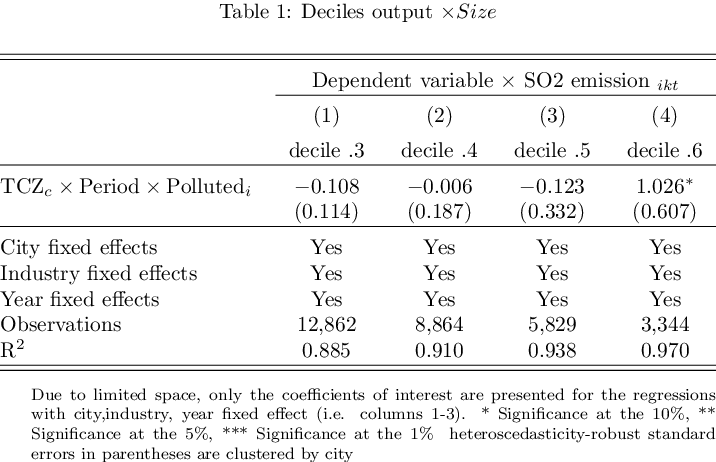

In [26]:
import os
decile=['& decile .3', 'decile .4',
        'decile .5','decile .6']

tb = """\\footnotesize{
Due to limited space, only the coefficients of interest are presented 
for the regressions with city,industry, year fixed effect (i.e. columns 1-3).
\sym{*} Significance at the 10\%, \sym{**} Significance at the 5\%, \sym{***} Significance at the 1\% \\
heteroscedasticity-robust standard errors in parentheses are clustered by city 
}
"""
lb.beautify(table_number = 1,
            remove_control= True,
            constraint = False,
            city_industry = False, 
            new_row = decile,
            table_nte =tb,
           jupyter_preview = True,
           resolution = 150)

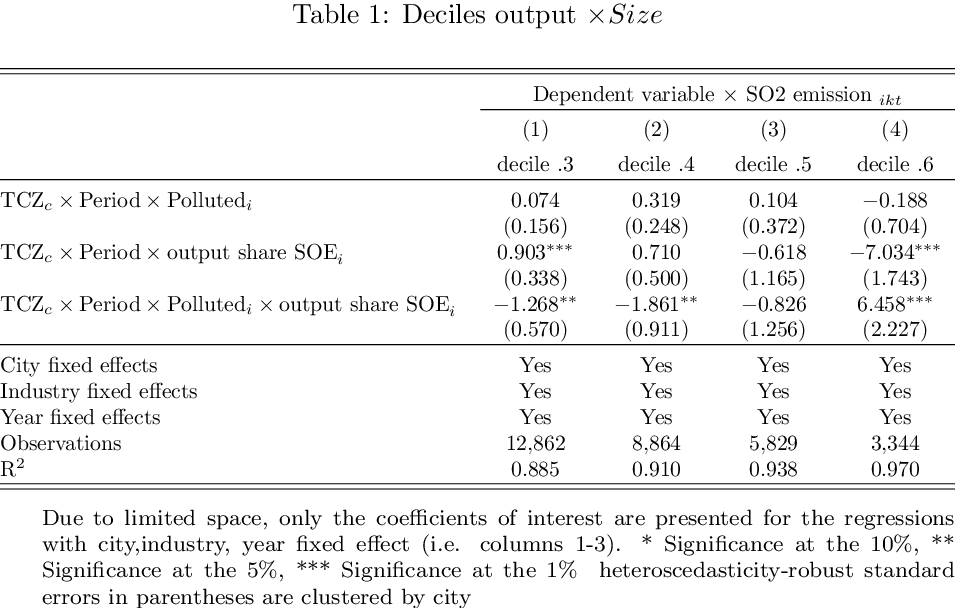

In [27]:
lb.beautify(table_number = 2,
            remove_control= True,
            constraint = False,
            city_industry = False, 
            new_row = decile,
            table_nte =tb,
           jupyter_preview = True, 
           resolution = 200)

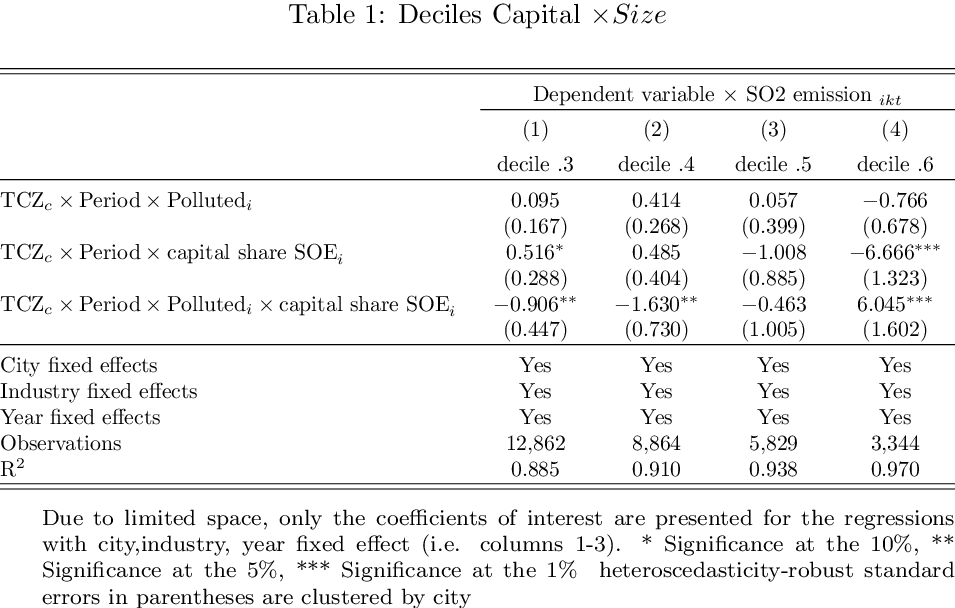

In [28]:
lb.beautify(table_number = 3,
            remove_control= True,
            constraint = False,
            city_industry = False, 
            new_row = decile,
            table_nte =tb,
           jupyter_preview = True, 
           resolution = 200)

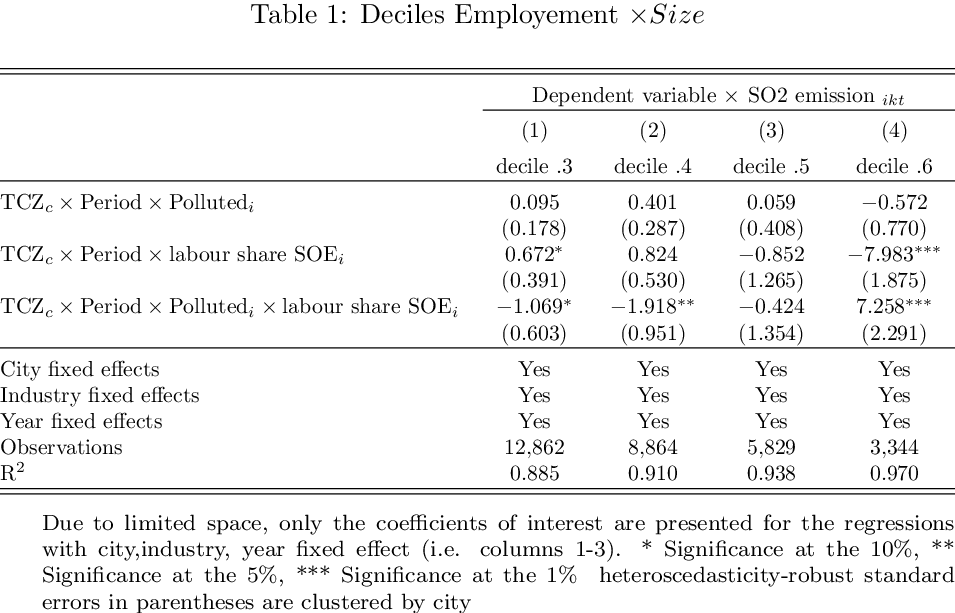

In [29]:
lb.beautify(table_number = 4,
            remove_control= True,
            constraint = False,
            city_industry = False, 
            new_row = decile,
            table_nte =tb,
           jupyter_preview = True, 
           resolution = 200)

#### Foreign

In [32]:
#### Output
l <- list()
l1 <- list()
for (i in seq(3, 7)){
    
    t1 <- felm(formula=log(tso2_cit) ~ TCZ_c * Period * polluted_thre 
                  + output_fcit + capital_fcit + labour_fcit
                  |
             FE_t_c + FE_t_i + FE_c_i  | 0 |
             industry, data= df_final_FOREIGN %>% filter(rank_share_output_ci > i),
             exactDOF=TRUE)
    
    t2 <- felm(formula=log(tso2_cit) ~ TCZ_c * Period *polluted_thre * out_share_SOE
                  + output_fcit + capital_fcit + labour_fcit
                  |
             FE_t_c + FE_t_i + FE_c_i  | 0 |
             industry, data= df_final_FOREIGN %>% filter(rank_share_output_ci > i),
             exactDOF=TRUE)
    
    l[[i - 2]] <- t1
    l1[[i-2]] <- t2
}

#### Capital
l2 <- list()
for (i in seq(3, 7)){
    
    t1 <- felm(formula=log(tso2_cit) ~ TCZ_c * Period *polluted_thre * cap_share_SOE
                  + output_fcit + capital_fcit + labour_fcit
                  |
             FE_t_c + FE_t_i + FE_c_i  | 0 |
             industry, data= df_final_FOREIGN %>% filter(rank_share_capital_ci > i),
             exactDOF=TRUE)

    l2[[i - 2]] <- t1
}

#### Employment
l3 <- list()
for (i in seq(3, 7)){
    
    t1 <- felm(formula=log(tso2_cit) ~ TCZ_c * Period *polluted_thre * lab_share_SOE
                  + output_fcit + capital_fcit + labour_fcit
                  |
             FE_t_c + FE_t_i + FE_c_i  | 0 |
             industry, data= df_final_FOREIGN %>% filter(rank_share_employement_ci > i),
             exactDOF=TRUE)
    
    l3[[i - 2]] <- t1
}

file.remove("table_5.txt")
file.remove("table_5.tex")
file.remove("table_6.txt")
file.remove("table_6.tex")
file.remove("table_7.txt")
file.remove("table_7.tex")
file.remove("table_8.txt")
file.remove("table_8.tex")

fe1 <- list(
    c("City fixed effects", "Yes", "Yes", "Yes", "Yes", "Yes", "Yes", "Yes", "Yes", "Yes", "Yes"),
             c("Industry fixed effects", "Yes", "Yes", "Yes", "Yes", "Yes", "Yes", "Yes", "Yes", "Yes", "Yes"),
             c("Year fixed effects","Yes", "Yes", "Yes", "Yes", "Yes", "Yes", "Yes", "Yes", "Yes", "Yes")
             )

table_1 <- go_latex(l,
    dep_var = "Dependent variable: \\text { SO2 emission }_{i k t}",
    title='Deciles output: Foreign',
    addFE=fe1,
    save=TRUE,
                    note = FALSE,
    name="table_5.txt"
)

table_1 <- go_latex(l1,
    dep_var = "Dependent variable: \\text { SO2 emission }_{i k t}",
    title='Deciles output: Foreign',
    addFE=fe1,
    save=TRUE,
                    note = FALSE,
    name="table_6.txt"
)

table_1 <- go_latex(l2,
    dep_var = "Dependent variable: \\text { SO2 emission }_{i k t}",
    title='Deciles Capital: Foreign',
    addFE=fe1,
    save=TRUE,
                    note = FALSE,
    name="table_7.txt"
)
table_1 <- go_latex(l3,
    dep_var = "Dependent variable: \\text { SO2 emission }_{i k t}",
    title='Deciles Employement: Foreign',
    addFE=fe1,
    save=TRUE,
                    note = FALSE,
    name="table_8.txt"
)

[1] TRUE

[1] TRUE

[1] TRUE

[1] FALSE

[1] TRUE

[1] FALSE

[1] TRUE

[1] FALSE

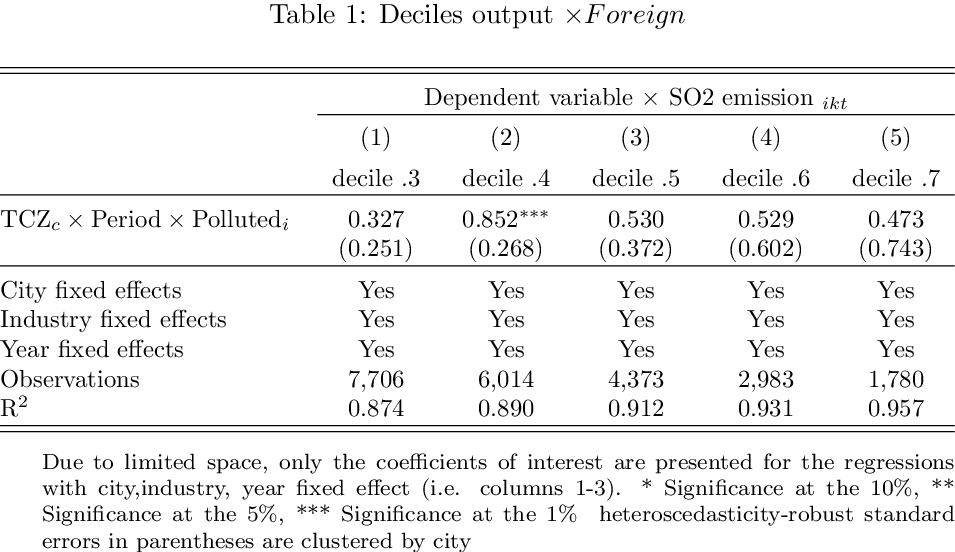

In [34]:
import os
decile=['& decile .3', 'decile .4',
        'decile .5','decile .6', ' decile .7']

tb = """\\footnotesize{
Due to limited space, only the coefficients of interest are presented 
for the regressions with city,industry, year fixed effect (i.e. columns 1-3).
\sym{*} Significance at the 10\%, \sym{**} Significance at the 5\%, \sym{***} Significance at the 1\% \\
heteroscedasticity-robust standard errors in parentheses are clustered by city 
}
"""
lb.beautify(table_number = 5,
            remove_control= True,
            constraint = False,
            city_industry = False, 
            new_row = decile,
            table_nte =tb,
           jupyter_preview = True,
           resolution = 200)

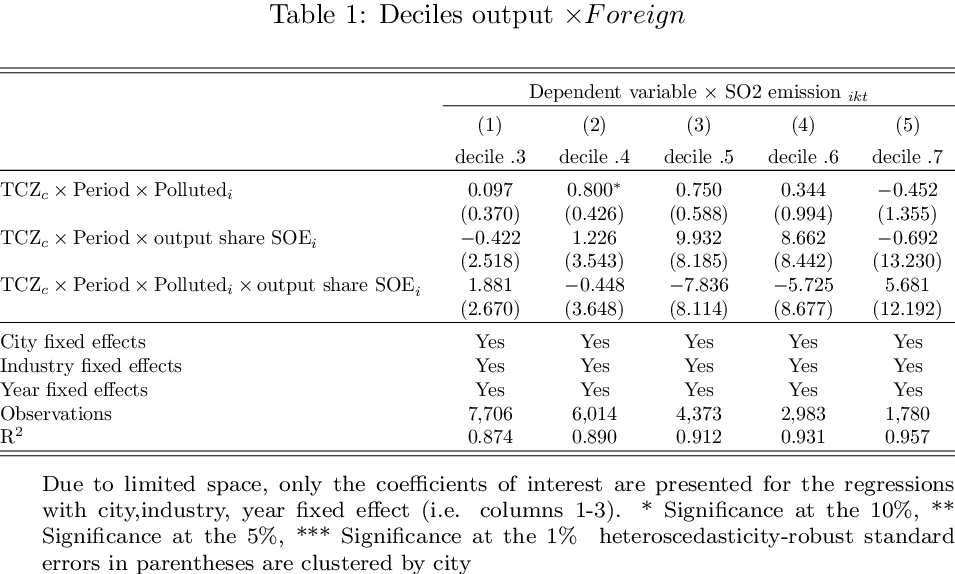

In [35]:
import os
decile=['& decile .3', 'decile .4',
        'decile .5','decile .6', ' decile .7']

tb = """\\footnotesize{
Due to limited space, only the coefficients of interest are presented 
for the regressions with city,industry, year fixed effect (i.e. columns 1-3).
\sym{*} Significance at the 10\%, \sym{**} Significance at the 5\%, \sym{***} Significance at the 1\% \\
heteroscedasticity-robust standard errors in parentheses are clustered by city 
}
"""
lb.beautify(table_number = 6,
            remove_control= True,
            constraint = False,
            city_industry = False, 
            new_row = decile,
            table_nte =tb,
           jupyter_preview = True,
           resolution = 200)

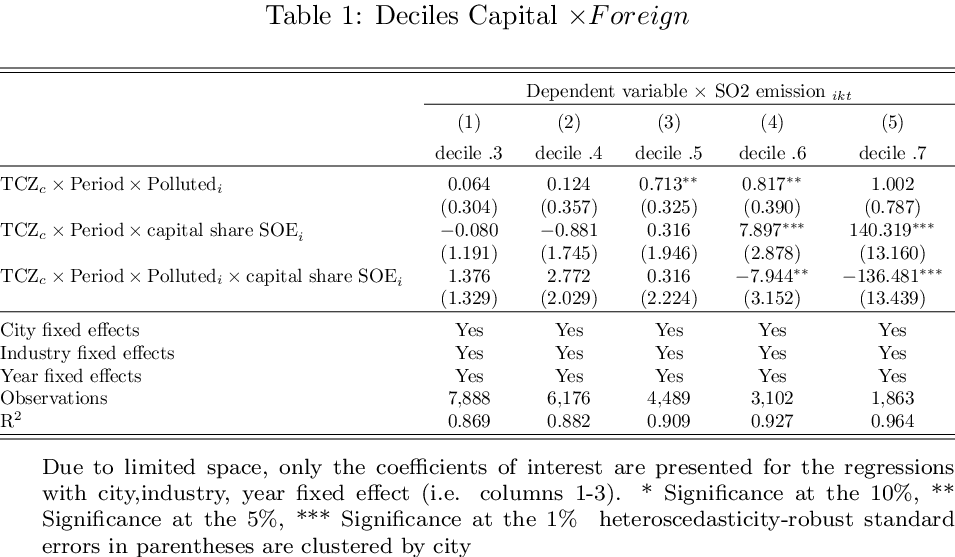

In [36]:
import os
decile=['& decile .3', 'decile .4',
        'decile .5','decile .6', ' decile .7']

tb = """\\footnotesize{
Due to limited space, only the coefficients of interest are presented 
for the regressions with city,industry, year fixed effect (i.e. columns 1-3).
\sym{*} Significance at the 10\%, \sym{**} Significance at the 5\%, \sym{***} Significance at the 1\% \\
heteroscedasticity-robust standard errors in parentheses are clustered by city 
}
"""
lb.beautify(table_number = 7,
            remove_control= True,
            constraint = False,
            city_industry = False, 
            new_row = decile,
            table_nte =tb,
           jupyter_preview = True,
           resolution = 200)

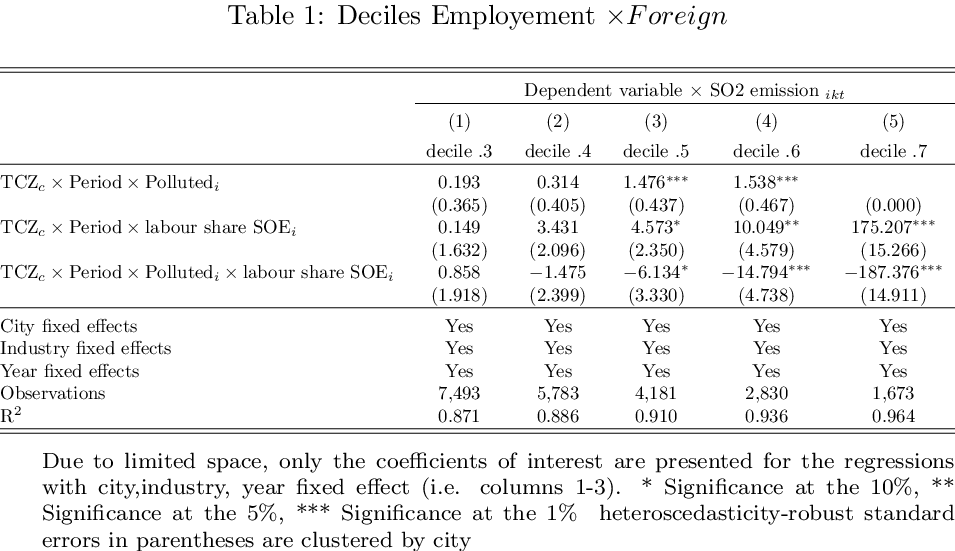

In [37]:
import os
decile=['& decile .3', 'decile .4',
        'decile .5','decile .6', ' decile .7']

tb = """\\footnotesize{
Due to limited space, only the coefficients of interest are presented 
for the regressions with city,industry, year fixed effect (i.e. columns 1-3).
\sym{*} Significance at the 10\%, \sym{**} Significance at the 5\%, \sym{***} Significance at the 1\% \\
heteroscedasticity-robust standard errors in parentheses are clustered by city 
}
"""
lb.beautify(table_number = 8,
            remove_control= True,
            constraint = False,
            city_industry = False, 
            new_row = decile,
            table_nte =tb,
           jupyter_preview = True,
           resolution = 200)

#### SOE

In [40]:
#### Output
l <- list()
l1 <- list()
for (i in seq(3, 7)){
    
    t1 <- felm(formula=log(tso2_cit) ~ TCZ_c * Period * polluted_thre 
                  + output_fcit + capital_fcit + labour_fcit
                  |
             FE_t_c + FE_t_i + FE_c_i  | 0 |
             industry, data= df_final_SOE %>% filter(rank_share_output_ci > i),
             exactDOF=TRUE)
    
    t2 <- felm(formula=log(tso2_cit) ~ TCZ_c * Period *polluted_thre * out_share_SOE
                  + output_fcit + capital_fcit + labour_fcit
                  |
             FE_t_c + FE_t_i + FE_c_i  | 0 |
             industry, data= df_final_SOE %>% filter(rank_share_output_ci > i),
             exactDOF=TRUE)
    
    l[[i - 2]] <- t1
    l1[[i-2]] <- t2
}

#### Capital
l2 <- list()
for (i in seq(3, 7)){
    
    t1 <- felm(formula=log(tso2_cit) ~ TCZ_c * Period *polluted_thre * cap_share_SOE
                  + output_fcit + capital_fcit + labour_fcit
                  |
             FE_t_c + FE_t_i + FE_c_i  | 0 |
             industry, data= df_final_SOE %>% filter(rank_share_capital_ci > i),
             exactDOF=TRUE)

    l2[[i - 2]] <- t1
}

#### Employment
l3 <- list()
for (i in seq(3, 7)){
    
    t1 <- felm(formula=log(tso2_cit) ~ TCZ_c * Period *polluted_thre * lab_share_SOE
                  + output_fcit + capital_fcit + labour_fcit
                  |
             FE_t_c + FE_t_i + FE_c_i  | 0 |
             industry, data= df_final_SOE %>% filter(rank_share_employement_ci > i),
             exactDOF=TRUE)
    
    l3[[i - 2]] <- t1
}

file.remove("table_9.txt")
file.remove("table_9.tex")
file.remove("table_10.txt")
file.remove("table_10.tex")
file.remove("table_11.txt")
file.remove("table_11.tex")
file.remove("table_12.txt")
file.remove("table_12.tex")

fe1 <- list(
    c("City fixed effects", "Yes", "Yes", "Yes", "Yes", "Yes", "Yes", "Yes", "Yes", "Yes", "Yes"),
             c("Industry fixed effects", "Yes", "Yes", "Yes", "Yes", "Yes", "Yes", "Yes", "Yes", "Yes", "Yes"),
             c("Year fixed effects","Yes", "Yes", "Yes", "Yes", "Yes", "Yes", "Yes", "Yes", "Yes", "Yes")
             )

table_1 <- go_latex(l,
    dep_var = "Dependent variable: \\text { SO2 emission }_{i k t}",
    title='Deciles output: SOE',
    addFE=fe1,
    save=TRUE,
                    note = FALSE,
    name="table_9.txt"
)

table_1 <- go_latex(l1,
    dep_var = "Dependent variable: \\text { SO2 emission }_{i k t}",
    title='Deciles output: SOE',
    addFE=fe1,
    save=TRUE,
                    note = FALSE,
    name="table_10.txt"
)

table_1 <- go_latex(l2,
    dep_var = "Dependent variable: \\text { SO2 emission }_{i k t}",
    title='Deciles Capital: SOE',
    addFE=fe1,
    save=TRUE,
                    note = FALSE,
    name="table_11.txt"
)
table_1 <- go_latex(l3,
    dep_var = "Dependent variable: \\text { SO2 emission }_{i k t}",
    title='Deciles Employement: SOE',
    addFE=fe1,
    save=TRUE,
                    note = FALSE,
    name="table_12.txt"
)

[1] TRUE

[1] TRUE

[1] TRUE

[1] FALSE

[1] TRUE

[1] FALSE

[1] TRUE

[1] FALSE

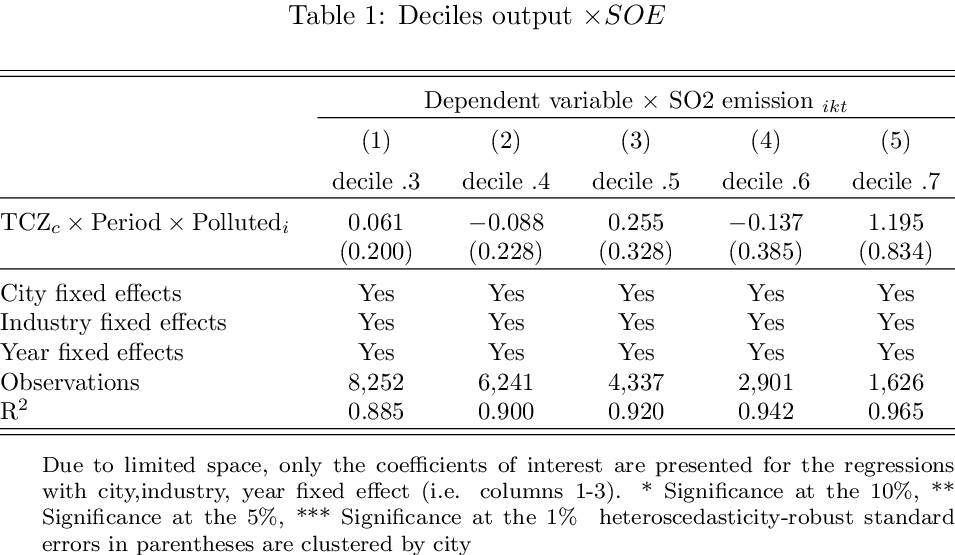

In [42]:
import os
decile=['& decile .3', 'decile .4',
        'decile .5','decile .6', ' decile .7']

tb = """\\footnotesize{
Due to limited space, only the coefficients of interest are presented 
for the regressions with city,industry, year fixed effect (i.e. columns 1-3).
\sym{*} Significance at the 10\%, \sym{**} Significance at the 5\%, \sym{***} Significance at the 1\% \\
heteroscedasticity-robust standard errors in parentheses are clustered by city 
}
"""
lb.beautify(table_number = 9,
            remove_control= True,
            constraint = False,
            city_industry = False, 
            new_row = decile,
            table_nte =tb,
           jupyter_preview = True,
           resolution = 200)

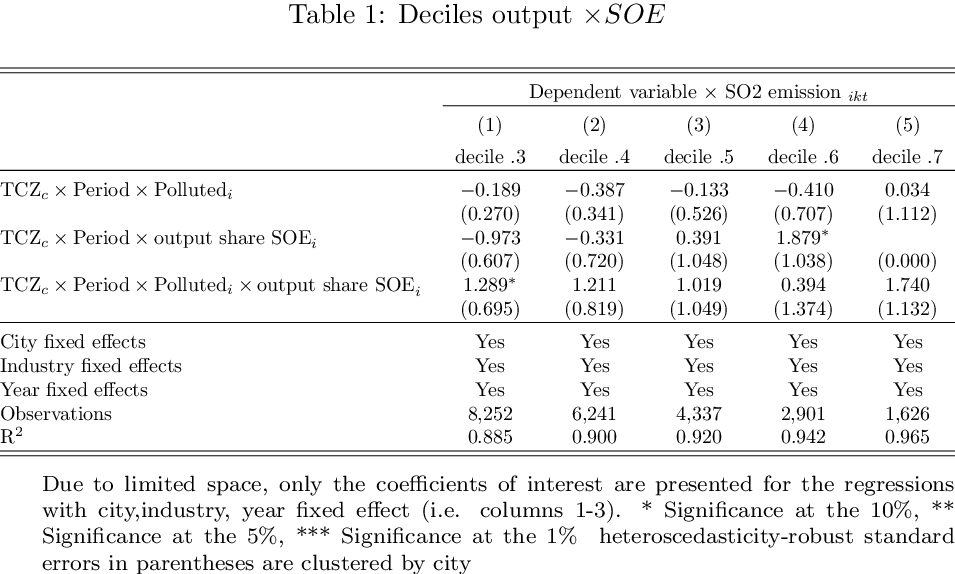

In [43]:
import os
decile=['& decile .3', 'decile .4',
        'decile .5','decile .6', ' decile .7']

tb = """\\footnotesize{
Due to limited space, only the coefficients of interest are presented 
for the regressions with city,industry, year fixed effect (i.e. columns 1-3).
\sym{*} Significance at the 10\%, \sym{**} Significance at the 5\%, \sym{***} Significance at the 1\% \\
heteroscedasticity-robust standard errors in parentheses are clustered by city 
}
"""
lb.beautify(table_number = 10,
            remove_control= True,
            constraint = False,
            city_industry = False, 
            new_row = decile,
            table_nte =tb,
           jupyter_preview = True,
           resolution = 200)

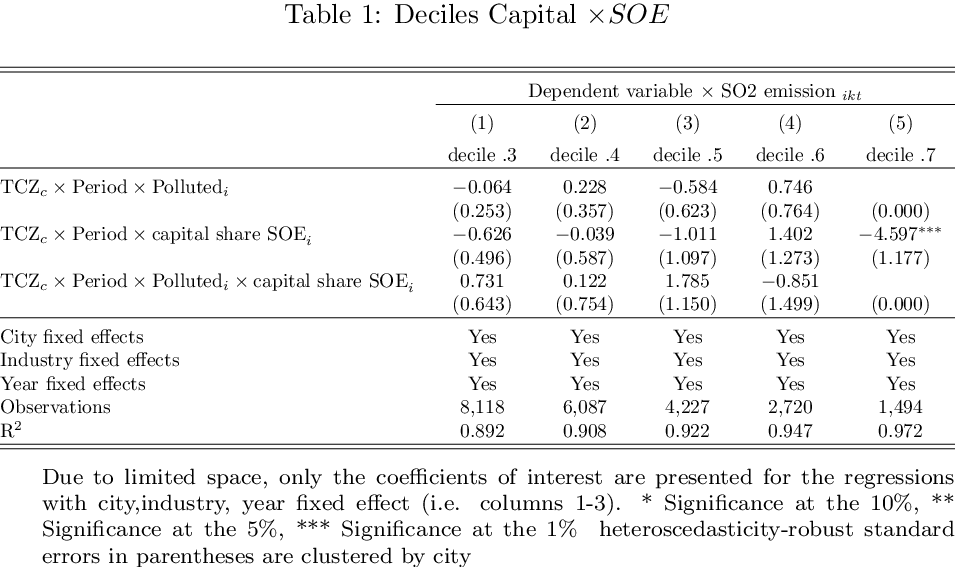

In [44]:
import os
decile=['& decile .3', 'decile .4',
        'decile .5','decile .6', ' decile .7']

tb = """\\footnotesize{
Due to limited space, only the coefficients of interest are presented 
for the regressions with city,industry, year fixed effect (i.e. columns 1-3).
\sym{*} Significance at the 10\%, \sym{**} Significance at the 5\%, \sym{***} Significance at the 1\% \\
heteroscedasticity-robust standard errors in parentheses are clustered by city 
}
"""
lb.beautify(table_number = 11,
            remove_control= True,
            constraint = False,
            city_industry = False, 
            new_row = decile,
            table_nte =tb,
           jupyter_preview = True,
           resolution = 200)

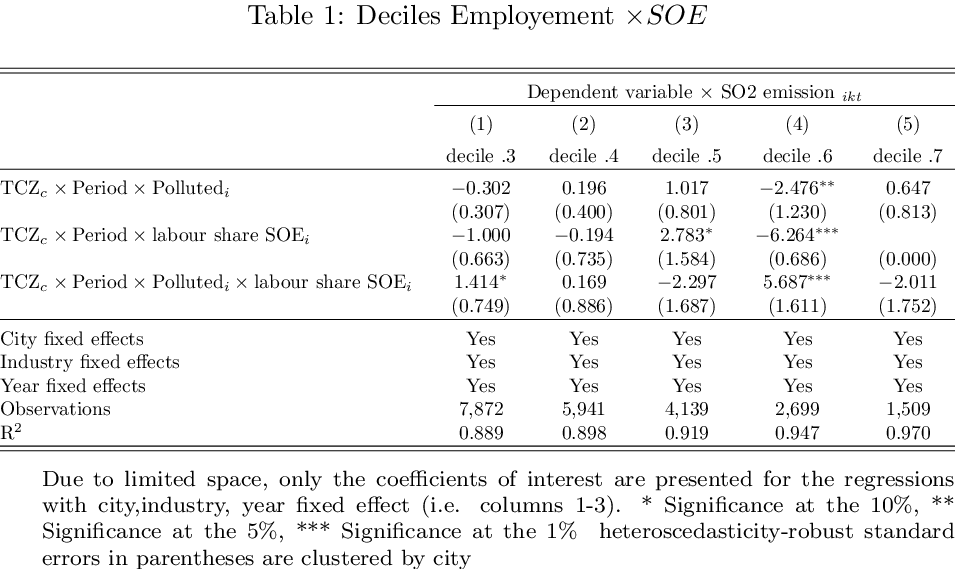

In [45]:
import os
decile=['& decile .3', 'decile .4',
        'decile .5','decile .6', ' decile .7']

tb = """\\footnotesize{
Due to limited space, only the coefficients of interest are presented 
for the regressions with city,industry, year fixed effect (i.e. columns 1-3).
\sym{*} Significance at the 10\%, \sym{**} Significance at the 5\%, \sym{***} Significance at the 1\% \\
heteroscedasticity-robust standard errors in parentheses are clustered by city 
}
"""
lb.beautify(table_number = 12,
            remove_control= True,
            constraint = False,
            city_industry = False, 
            new_row = decile,
            table_nte =tb,
           jupyter_preview = True,
           resolution = 200)

### Absolute share

#### Foreign

Not enough observation, or say differently, no sectors are dominated by Foreign firms solenly

In [46]:
##### Panel A
## Output
t1 <- felm(formula=log(tso2_cit) ~ TCZ_c * Period *polluted_thre 
                  + output_fcit + capital_fcit + labour_fcit
                  |
             FE_t_c + FE_t_i + FE_c_i  | 0 |
             industry, data= df_final_FOREIGN %>% filter(output =='Above'),
             exactDOF=TRUE)
    
t2 <- felm(formula=log(tso2_cit) ~ TCZ_c * Period *polluted_thre * out_share_SOE
                  + output_fcit + capital_fcit + labour_fcit
                  |
             FE_t_c + FE_t_i + FE_c_i  | 0 |
             industry, data= df_final_FOREIGN %>% filter(output =='Above'),
             exactDOF=TRUE)
## Capital
t3 <- felm(formula=log(tso2_cit) ~ TCZ_c * Period *polluted_thre 
                  + output_fcit + capital_fcit + labour_fcit
                  |
             FE_t_c + FE_t_i + FE_c_i  | 0 |
             industry, data= df_final_FOREIGN %>% filter(capital =='Above'),
             exactDOF=TRUE)
    
t4 <- felm(formula=log(tso2_cit) ~ TCZ_c * Period *polluted_thre * cap_share_SOE
                  + output_fcit + capital_fcit + labour_fcit
                  |
             FE_t_c + FE_t_i + FE_c_i  | 0 |
             industry, data= df_final_FOREIGN %>% filter(capital =='Above'),
             exactDOF=TRUE)

## Employment
t5 <- felm(formula=log(tso2_cit) ~ TCZ_c * Period *polluted_thre 
                  + output_fcit + capital_fcit + labour_fcit
                  |
             FE_t_c + FE_t_i + FE_c_i  | 0 |
             industry, data= df_final_FOREIGN %>% filter(employment =='Above'),
             exactDOF=TRUE)
    
t6 <- felm(formula=log(tso2_cit) ~ TCZ_c * Period *polluted_thre * lab_share_SOE
                  + output_fcit + capital_fcit + labour_fcit
                  |
             FE_t_c + FE_t_i + FE_c_i  | 0 |
             industry, data= df_final_FOREIGN %>% filter(employment =='Above'),
             exactDOF=TRUE)
la <- list(t1, t2, t3, t4, t5, t6)
##### ##### ##### ##### ##### ##### ##### ##### ##### ##### ##### ##### ##### 
##### ##### ##### ##### ##### ##### ##### ##### ##### ##### ##### ##### ##### 
##### Panel B
t1 <- felm(formula=log(tso2_cit) ~ TCZ_c * Period *polluted_thre 
                  + output_fcit + capital_fcit + labour_fcit
                  |
             FE_t_c + FE_t_i + FE_c_i  | 0 |
             industry, data= df_final_FOREIGN %>% filter(output =='Below'),
             exactDOF=TRUE)
    
t2 <- felm(formula=log(tso2_cit) ~ TCZ_c * Period *polluted_thre * out_share_SOE
                  + output_fcit + capital_fcit + labour_fcit
                  |
             FE_t_c + FE_t_i + FE_c_i  | 0 |
             industry, data= df_final_FOREIGN %>% filter(output =='Below'),
             exactDOF=TRUE)
## Capital
t3 <- felm(formula=log(tso2_cit) ~ TCZ_c * Period *polluted_thre 
                  + output_fcit + capital_fcit + labour_fcit
                  |
             FE_t_c + FE_t_i + FE_c_i  | 0 |
             industry, data= df_final_FOREIGN %>% filter(capital =='Below'),
             exactDOF=TRUE)
    
t4 <- felm(formula=log(tso2_cit) ~ TCZ_c * Period *polluted_thre * cap_share_SOE
                  + output_fcit + capital_fcit + labour_fcit
                  |
             FE_t_c + FE_t_i + FE_c_i  | 0 |
             industry, data= df_final_FOREIGN %>% filter(capital =='Below'),
             exactDOF=TRUE)

## Employment
t5 <- felm(formula=log(tso2_cit) ~ TCZ_c * Period *polluted_thre 
                  + output_fcit + capital_fcit + labour_fcit
                  |
             FE_t_c + FE_t_i + FE_c_i  | 0 |
             industry, data= df_final_FOREIGN %>% filter(employment =='Below'),
             exactDOF=TRUE)
    
t6 <- felm(formula=log(tso2_cit) ~ TCZ_c * Period *polluted_thre * lab_share_SOE
                  + output_fcit + capital_fcit + labour_fcit
                  |
             FE_t_c + FE_t_i + FE_c_i  | 0 |
             industry, data= df_final_FOREIGN %>% filter(employment =='Below'),
             exactDOF=TRUE)
lb <- list(t1, t2, t3, t4, t5, t6)

file.remove("table_13.txt")
file.remove("table_13.tex")
file.remove("table_14.txt")
file.remove("table_14.tex")
fe1 <- list(
    c("City fixed effects", "Yes", "Yes", "Yes", "Yes", "Yes", "Yes"),
             c("Industry fixed effects", "Yes", "Yes", "Yes", "Yes", "Yes", "Yes"),
             c("Year fixed effects", "Yes", "Yes", "Yes", "Yes", "Yes", "Yes")
             )

table_1 <- go_latex(la,
    dep_var = "Dependent variable: \\text { SO2 emission }_{i k t}",
    title='Panel A: Foreign',
    addFE=fe1,
    save=TRUE,
                    note = FALSE,
    name="table_13.txt"
)
table_1 <- go_latex(lb,
    dep_var = "Dependent variable: \\text { SO2 emission }_{i k t}",
    title='Panel B: Foreign',
    addFE=fe1,
    save=TRUE,
                    note = FALSE,
    name="table_14.txt"
)

[1] FALSE

[1] FALSE

[1] FALSE

[1] FALSE

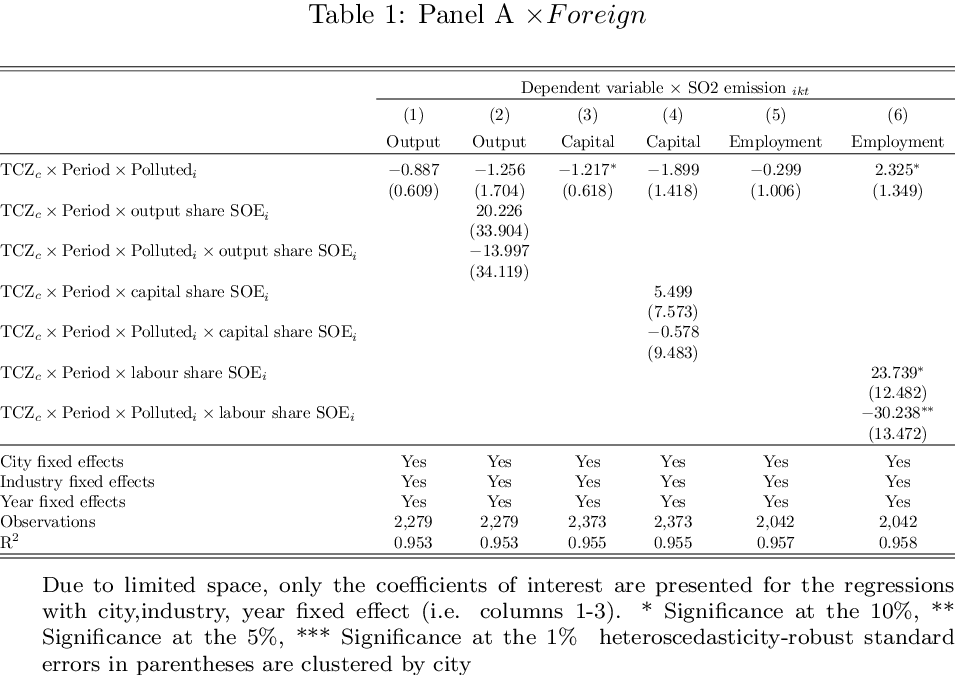

In [47]:
import os
decile=['& Output','Output',
        'Capital', 'Capital',
       'Employment','Employment']

tb = """\\footnotesize{
Due to limited space, only the coefficients of interest are presented 
for the regressions with city,industry, year fixed effect (i.e. columns 1-3).
\sym{*} Significance at the 10\%, \sym{**} Significance at the 5\%, \sym{***} Significance at the 1\% \\
heteroscedasticity-robust standard errors in parentheses are clustered by city 
}
"""
lb.beautify(table_number = 13,
            remove_control= True,
            constraint = False,
            city_industry = False, 
            new_row = decile,
            table_nte =tb,
            jupyter_preview = True, 
           resolution = 200)

In [ ]:
import os
decile=['& Output','Output',
        'Capital', 'Capital',
       'Employment','Employment']

tb = """\\footnotesize{
Due to limited space, only the coefficients of interest are presented 
for the regressions with city,industry, year fixed effect (i.e. columns 1-3).
\sym{*} Significance at the 10\%, \sym{**} Significance at the 5\%, \sym{***} Significance at the 1\% \\
heteroscedasticity-robust standard errors in parentheses are clustered by city 
}
"""
lb.beautify(table_number = 14,
            remove_control= True,
            constraint = False,
            city_industry = False, 
            new_row = decile,
            table_nte =tb,
            jupyter_preview = True, 
           resolution = 200)

#### SOE

Reminder, in the table below, we include sectors solenly dominated by SOE -> Share output/cap/emp of SOE stricly superior with Private

In [ ]:
##### Panel A
## Output
t1 <- felm(formula=log(tso2_cit) ~ TCZ_c * Period *polluted_thre 
                  + output_fcit + capital_fcit + labour_fcit
                  |
             FE_t_c + FE_t_i + FE_c_i  | 0 |
             industry, data= df_final_SOE %>% filter(output =='Above'),
             exactDOF=TRUE)
    
t2 <- felm(formula=log(tso2_cit) ~ TCZ_c * Period *polluted_thre * out_share_SOE
                  + output_fcit + capital_fcit + labour_fcit
                  |
             FE_t_c + FE_t_i + FE_c_i  | 0 |
             industry, data= df_final_SOE %>% filter(output =='Above'),
             exactDOF=TRUE)
## Capital
t3 <- felm(formula=log(tso2_cit) ~ TCZ_c * Period *polluted_thre 
                  + output_fcit + capital_fcit + labour_fcit
                  |
             FE_t_c + FE_t_i + FE_c_i  | 0 |
             industry, data= df_final_SOE %>% filter(capital =='Above'),
             exactDOF=TRUE)
    
t4 <- felm(formula=log(tso2_cit) ~ TCZ_c * Period *polluted_thre * cap_share_SOE
                  + output_fcit + capital_fcit + labour_fcit
                  |
             FE_t_c + FE_t_i + FE_c_i  | 0 |
             industry, data= df_final_SOE %>% filter(capital =='Above'),
             exactDOF=TRUE)

## Employment
t5 <- felm(formula=log(tso2_cit) ~ TCZ_c * Period *polluted_thre 
                  + output_fcit + capital_fcit + labour_fcit
                  |
             FE_t_c + FE_t_i + FE_c_i  | 0 |
             industry, data= df_final_SOE %>% filter(employment =='Above'),
             exactDOF=TRUE)
    
t6 <- felm(formula=log(tso2_cit) ~ TCZ_c * Period *polluted_thre * lab_share_SOE
                  + output_fcit + capital_fcit + labour_fcit
                  |
             FE_t_c + FE_t_i + FE_c_i  | 0 |
             industry, data= df_final_SOE %>% filter(employment =='Above'),
             exactDOF=TRUE)
la <- list(t1, t2, t3, t4, t5, t6)
##### ##### ##### ##### ##### ##### ##### ##### ##### ##### ##### ##### ##### 
##### ##### ##### ##### ##### ##### ##### ##### ##### ##### ##### ##### ##### 
##### Panel B
t1 <- felm(formula=log(tso2_cit) ~ TCZ_c * Period *polluted_thre 
                  + output_fcit + capital_fcit + labour_fcit
                  |
             FE_t_c + FE_t_i + FE_c_i  | 0 |
             industry, data= df_final_SOE %>% filter(output =='Below'),
             exactDOF=TRUE)
    
t2 <- felm(formula=log(tso2_cit) ~ TCZ_c * Period *polluted_thre * out_share_SOE
                  + output_fcit + capital_fcit + labour_fcit
                  |
             FE_t_c + FE_t_i + FE_c_i  | 0 |
             industry, data= df_final_SOE %>% filter(output =='Below'),
             exactDOF=TRUE)
## Capital
t3 <- felm(formula=log(tso2_cit) ~ TCZ_c * Period *polluted_thre 
                  + output_fcit + capital_fcit + labour_fcit
                  |
             FE_t_c + FE_t_i + FE_c_i  | 0 |
             industry, data= df_final_SOE %>% filter(capital =='Below'),
             exactDOF=TRUE)
    
t4 <- felm(formula=log(tso2_cit) ~ TCZ_c * Period *polluted_thre * cap_share_SOE
                  + output_fcit + capital_fcit + labour_fcit
                  |
             FE_t_c + FE_t_i + FE_c_i  | 0 |
             industry, data= df_final_SOE %>% filter(capital =='Below'),
             exactDOF=TRUE)

## Employment
t5 <- felm(formula=log(tso2_cit) ~ TCZ_c * Period *polluted_thre 
                  + output_fcit + capital_fcit + labour_fcit
                  |
             FE_t_c + FE_t_i + FE_c_i  | 0 |
             industry, data= df_final_SOE %>% filter(employment =='Below'),
             exactDOF=TRUE)
    
t6 <- felm(formula=log(tso2_cit) ~ TCZ_c * Period *polluted_thre * lab_share_SOE
                  + output_fcit + capital_fcit + labour_fcit
                  |
             FE_t_c + FE_t_i + FE_c_i  | 0 |
             industry, data= df_final_SOE %>% filter(employment =='Below'),
             exactDOF=TRUE)
lb <- list(t1, t2, t3, t4, t5, t6)

file.remove("table_15.txt")
file.remove("table_15.tex")
file.remove("table_16.txt")
file.remove("table_16.tex")
fe1 <- list(
    c("City fixed effects", "Yes", "Yes", "Yes", "Yes", "Yes", "Yes"),
             c("Industry fixed effects", "Yes", "Yes", "Yes", "Yes", "Yes", "Yes"),
             c("Year fixed effects", "Yes", "Yes", "Yes", "Yes", "Yes", "Yes")
             )

table_1 <- go_latex(la,
    dep_var = "Dependent variable: \\text { SO2 emission }_{i k t}",
    title='Panel A: SOE',
    addFE=fe1,
    save=TRUE,
                    note = FALSE,
    name="table_15.txt"
)
table_1 <- go_latex(lb,
    dep_var = "Dependent variable: \\text { SO2 emission }_{i k t}",
    title='Panel B: SOE',
    addFE=fe1,
    save=TRUE,
                    note = FALSE,
    name="table_16.txt"
)

In [ ]:
import os
decile=['& Output','Output',
        'Capital', 'Capital',
       'Employment','Employment']

tb = """\\footnotesize{
Due to limited space, only the coefficients of interest are presented 
for the regressions with city,industry, year fixed effect (i.e. columns 1-3).
\sym{*} Significance at the 10\%, \sym{**} Significance at the 5\%, \sym{***} Significance at the 1\% \\
heteroscedasticity-robust standard errors in parentheses are clustered by city 
}
"""
lb.beautify(table_number = 15,
            remove_control= True,
            constraint = False,
            city_industry = False, 
            new_row = decile,
            table_nte =tb,
            jupyter_preview = True, 
           resolution = 200)

In [ ]:
lb.beautify(table_number = 16,
            remove_control= True,
            constraint = False,
            city_industry = False, 
            new_row = decile,
            table_nte =tb,
            jupyter_preview = True, 
            resolution = 200)